In [1]:
%cd ../..
%load_ext autoreload
%autoreload 2
import datajoint as dj; 
import os
# set the query cache path
dj.config['query_cache'] = os.path.expanduser('~/dj_query_cache')
# access the active connection object for the tables
conn = dj.conn() # if queries co-located with tables
# activate query caching for a namespace called 'main'
#conn.set_query_cache(query_cache='main')
conn.set_query_cache()
conn.purge_query_cache()

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({'font.size': 20})
from pipeline import lab, get_schema_name, experiment, foraging_model, ephys, foraging_analysis, histology, ccf, report, psth_foraging
from pipeline.plot import unit_psth
from pipeline.plot.foraging_model_plot import plot_session_model_comparison, plot_session_fitted_choice, plot_unit_all_in_one
foraging_sessions = (foraging_analysis.SessionTaskProtocol & 'session_task_protocol=100').proj()

/home/jupyter/map-ephys


[2022-11-17 01:37:36,564][INFO]: Connecting map-superuser@datajoint.mesoscale-activity-map.org:3306
[2022-11-17 01:37:36,624][INFO]: Connected map-superuser@datajoint.mesoscale-activity-map.org:3306


In [ ]:
h2o, date, imec, unit = 'HH13', '2021-11-12', 1, 22
unit_key = (ephys.Unit() & (experiment.Session & f'session_date = "{date}"') & (lab.WaterRestriction & f'water_restriction_number = "{h2o}"') & {'insertion_number': imec + 1, 'unit_uid': unit}).fetch1("KEY")

In [ ]:
plot_unit_all_in_one(unit_key)

In [ ]:
len(psth_foraging.UnitPeriodLinearFit.key_source)

In [ ]:
import time
from datetime import datetime
last = 0
total = len(psth_foraging.UnitPeriodLinearFit.key_source)
while 1:
    this = len(psth_foraging.UnitPeriodLinearFit())
    print(f'{datetime.now()}: + {(this-last)/10} per sec, total {this}, {this/total:2%}')
    last = this
    time.sleep(10)

In [ ]:
len(psth_foraging.UnitPeriodActivity())

In [132]:
len(psth_foraging.UnitPeriodLinearFit())

711544

In [162]:
len(psth_foraging.UnitPeriodLinearFit.key_source - psth_foraging.UnitPeriodLinearFit)

5

In [ ]:
1 - len(psth_foraging.UnitPeriodActivity.key_source - psth_foraging.UnitPeriodActivity) / len(psth_foraging.UnitPeriodActivity.key_source)

In [169]:
1 - len(psth_foraging.UnitPeriodLinearFit.key_source - psth_foraging.UnitPeriodLinearFit) / len(psth_foraging.UnitPeriodLinearFit.key_source)

1.0

In [168]:
from pipeline.shell import print_current_jobs
print_current_jobs()

                                   reserve_count          oldest_job  \
table                                                                  
foraging_analysis.TrialStats       1             2022-09-16 02:29:54   
psth_foraging.UnitPeriodLinearFit  31            2022-09-30 20:45:58   

                                           newest_job  error_count  
table                                                               
foraging_analysis.TrialStats      2022-09-16 02:29:54  0            
psth_foraging.UnitPeriodLinearFit 2022-09-30 20:46:45  0            


,reserve_count,oldest_job,newest_job,error_count
table,,,,
foraging_analysis.TrialStats,1,2022-09-16 02:29:54,2022-09-16 02:29:54,0
psth_foraging.UnitPeriodLinearFit,31,2022-09-30 20:45:58,2022-09-30 20:46:45,0


In [61]:
s = dj.schema('map_v2_psth_foraging', create_schema=False)

In [150]:
s.jobs.delete()

In [157]:
s.jobs

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp


In [160]:
(s.jobs & 'status = "error"').fetch('key', 'error_message', limit=10, offset=0)

[array([], dtype=object), array([], dtype=object)]

In [ ]:
 s.jobs.fetch('key', order_by='pid')

In [76]:
%%time
len((ephys.Unit & foraging_analysis.SessionTaskProtocol - experiment.PhotostimForagingTrial) * psth_foraging.LinearModelPeriodToFit * psth_foraging.LinearModelBehaviorModelToFit * psth_foraging.LinearModel)

CPU times: user 23.4 ms, sys: 4.96 ms, total: 28.3 ms
Wall time: 396 ms


744723

In [79]:
len(ephys.Unit & foraging_analysis.SessionTaskProtocol - experiment.PhotostimForagingTrial)

35463

In [80]:
foraging_model.FittedSessionModel & experiment.PhotostimForagingTrial

subject_id institution 6 digit animal ID,session session number,model_id,n_trials,n_params,log_likelihood raw log likelihood of the model,aic AIC,bic BIC,lpt Likelihood-Per-Trial raw,lpt_aic Likelihood-Per-Trial with AIC penalty,lpt_bic Likelihood-Per-Trial with AIC penalty,prediction_accuracy non-cross-validated prediction accuracy,cross_valid_accuracy_fit cross-validated accuracy (fitting set),cross_valid_accuracy_test cross-validated accuracy (testing set),cross_valid_accuracy_test_bias_only accuracy predicted only by bias (testing set)


In [81]:
ephys.ProbeInsertion & experiment.PhotostimForagingTrial

subject_id institution 6 digit animal ID,session session number,insertion_number,probe unique identifier for this model of probe (e.g. part number),probe_type e.g. neuropixels_1.0,electrode_config_name user friendly name
494694,17,1,18005108522,neuropixels 1.0 - 3B,1-384
494694,18,1,18005107812,neuropixels 1.0 - 3B,1-384
494694,19,1,18005108522,neuropixels 1.0 - 3B,1-384
494694,20,1,18005107812,neuropixels 1.0 - 3B,1-384
494694,21,1,18005108522,neuropixels 1.0 - 3B,1-384
616134,20,1,18005108522,neuropixels 1.0 - 3B,1-384
616134,20,2,18005123392,neuropixels 1.0 - 3B,1-384
616134,21,1,18005108622,neuropixels 1.0 - 3B,1-384
616134,21,2,18005107871,neuropixels 1.0 - 3B,1-384


In [165]:
dj.U('subject_id', 'session').aggr(psth_foraging.UnitPeriodLinearFit.key_source-psth_foraging.UnitPeriodLinearFit, count='COUNT(*)')

subject_id institution 6 digit animal ID,session session number,count calculated attribute


In [101]:
key = {'subject_id': 473361, 'session': 42, 'insertion_number': 1, 'clustering_method': 'kilosort2', 'unit': 174, 'period': 'delay', 'behavior_model': 'best_aic', 'multi_linear_model': 'Q_rel + Q_tot + rpe'}
foraging_model.FittedSessionModel & key
foraging_model.FittedSessionModelComparison & key

subject_id institution 6 digit animal ID,session session number,model_comparison_idx
473361,42,0
473361,42,1
473361,42,2


In [ ]:
psth_foraging.UnitPeriodLinearFit.populate(key, display_progress=True)

In [135]:
psth_foraging.UnitPeriodActivity & {'subject_id': 473361, 'session': 42, 'insertion_number': 1, 'clustering_method': 'kilosort2', 'unit': 174, 'behavior_model': 'best_aic', 'multi_linear_model': 'Q_rel + Q_tot + rpe'}

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,unit,period,trial Actual trials,spike_counts,durations,firing_rates
473361,42,1,kilosort2,174,before_2,=BLOB=,=BLOB=,=BLOB=,=BLOB=
473361,42,1,kilosort2,174,delay,=BLOB=,=BLOB=,=BLOB=,=BLOB=
473361,42,1,kilosort2,174,go_1.2,=BLOB=,=BLOB=,=BLOB=,=BLOB=
473361,42,1,kilosort2,174,go_to_end,=BLOB=,=BLOB=,=BLOB=,=BLOB=
473361,42,1,kilosort2,174,iti_all,=BLOB=,=BLOB=,=BLOB=,=BLOB=
473361,42,1,kilosort2,174,iti_first_2,=BLOB=,=BLOB=,=BLOB=,=BLOB=
473361,42,1,kilosort2,174,iti_last_2,=BLOB=,=BLOB=,=BLOB=,=BLOB=


Check incomplete `psth_foraging.UnitPeriodActivity`

In [13]:
(ephys.Unit & psth_foraging.UnitPeriodActivity).aggr(psth_foraging.UnitPeriodActivity, count='COUNT(*)') & 'count<7'

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,unit,count calculated attribute


In [58]:
a = psth_foraging.UnitPeriodLinearFit.progress()

UnitPeriodLinearFit  Completed 711541 of 744723 (95.5%)   2022-09-30 20:03:29


In [ ]:
(dj.U('host') & s.jobs).aggr(s.jobs, count='COUNT(*)')

In [104]:
psth_foraging.UnitPeriodActivity.progress() 

UnitPeriodActivity   Completed 40845 of 40845 (100.0%)   2022-09-30 20:19:32


(0, 40845)

In [ ]:
psth_foraging.UnitPeriodActivity.populate(display_progress=True , reserve_jobs=True)

In [ ]:
psth_foraging.UnitPeriodActivity & {'subject_id': 490931, 'session': 22, 'insertion_number': 2, 'clustering_method': 'kilosort2', 'unit': 473}

In [ ]:
psth_foraging.UnitPeriodLinearFit.delete()

In [ ]:
compute_unit_period_activity(unit_key, 'go_to_end')

In [ ]:
psth_foraging.UnitPeriodActivity.populate()

In [ ]:
psth_foraging.UnitPeriodActivity()

In [ ]:
psth_foraging.UnitPeriodLinearFit.populate(display_progress=True)

In [ ]:
psth_foraging.UnitPeriodLinearFit.Param()

In [ ]:
%%time
(psth_foraging.UnitPeriodActivity & unit_key & {'period': 'go_to_end'}
                           ).fetch('trial', 'firing_rates', as_dict=True)[0]

In [ ]:
%%time
psth_foraging.compute_unit_period_activity(unit_key, 'go_to_end')

In [5]:
lv = lvs[0]

In [25]:
%%time
len(q_unit)

CPU times: user 4.41 ms, sys: 26 µs, total: 4.44 ms
Wall time: 197 ms


10850

In [12]:
%%time
df = pd.DataFrame((q_all & {'var_name': lv}).proj('beta', 'p', 't', 'area_num_units').fetch())

NameError: name 'lv' is not defined

In [25]:
dj.U('annotation').aggr(((ephys.Unit & foraging_sessions)* histology.ElectrodeCCFPosition.ElectrodePosition) * ccf.CCFAnnotation, count='count(*)').fetch(format='frame', order_by='count desc')[:30]

,count
annotation,
"Lateral septal nucleus, rostral (rostroventral) part",1024
"Secondary motor area, layer 5",705
"Prelimbic area, layer 5",630
"Anterior cingulate area, dorsal part, layer 5",524
Caudoputamen,480
"Secondary motor area, layer 2/3",407
"Lateral septal nucleus, ventral part",391
"Anterior cingulate area, ventral part, layer 5",350
Striatum,331


In [11]:
dj.U('annotation').aggr(((ephys.Unit & foraging_sessions)* histology.ElectrodeCCFPosition.ElectrodePosition) * ccf.CCFAnnotation, count='count(*)').fetch(format='frame', order_by='count desc')[:30]

,count
annotation,
"Secondary motor area, layer 5",2394
Caudoputamen,2285
"Lateral septal nucleus, rostral (rostroventral) part",1761
"Prelimbic area, layer 5",1428
"Secondary motor area, layer 2/3",1206
"Anterior cingulate area, dorsal part, layer 5",1148
"Secondary motor area, layer 6a",1097
Nucleus accumbens,851
Ventral medial nucleus of the thalamus,723


define queries...
done!
plotting t-distributions
plotting weights distribution


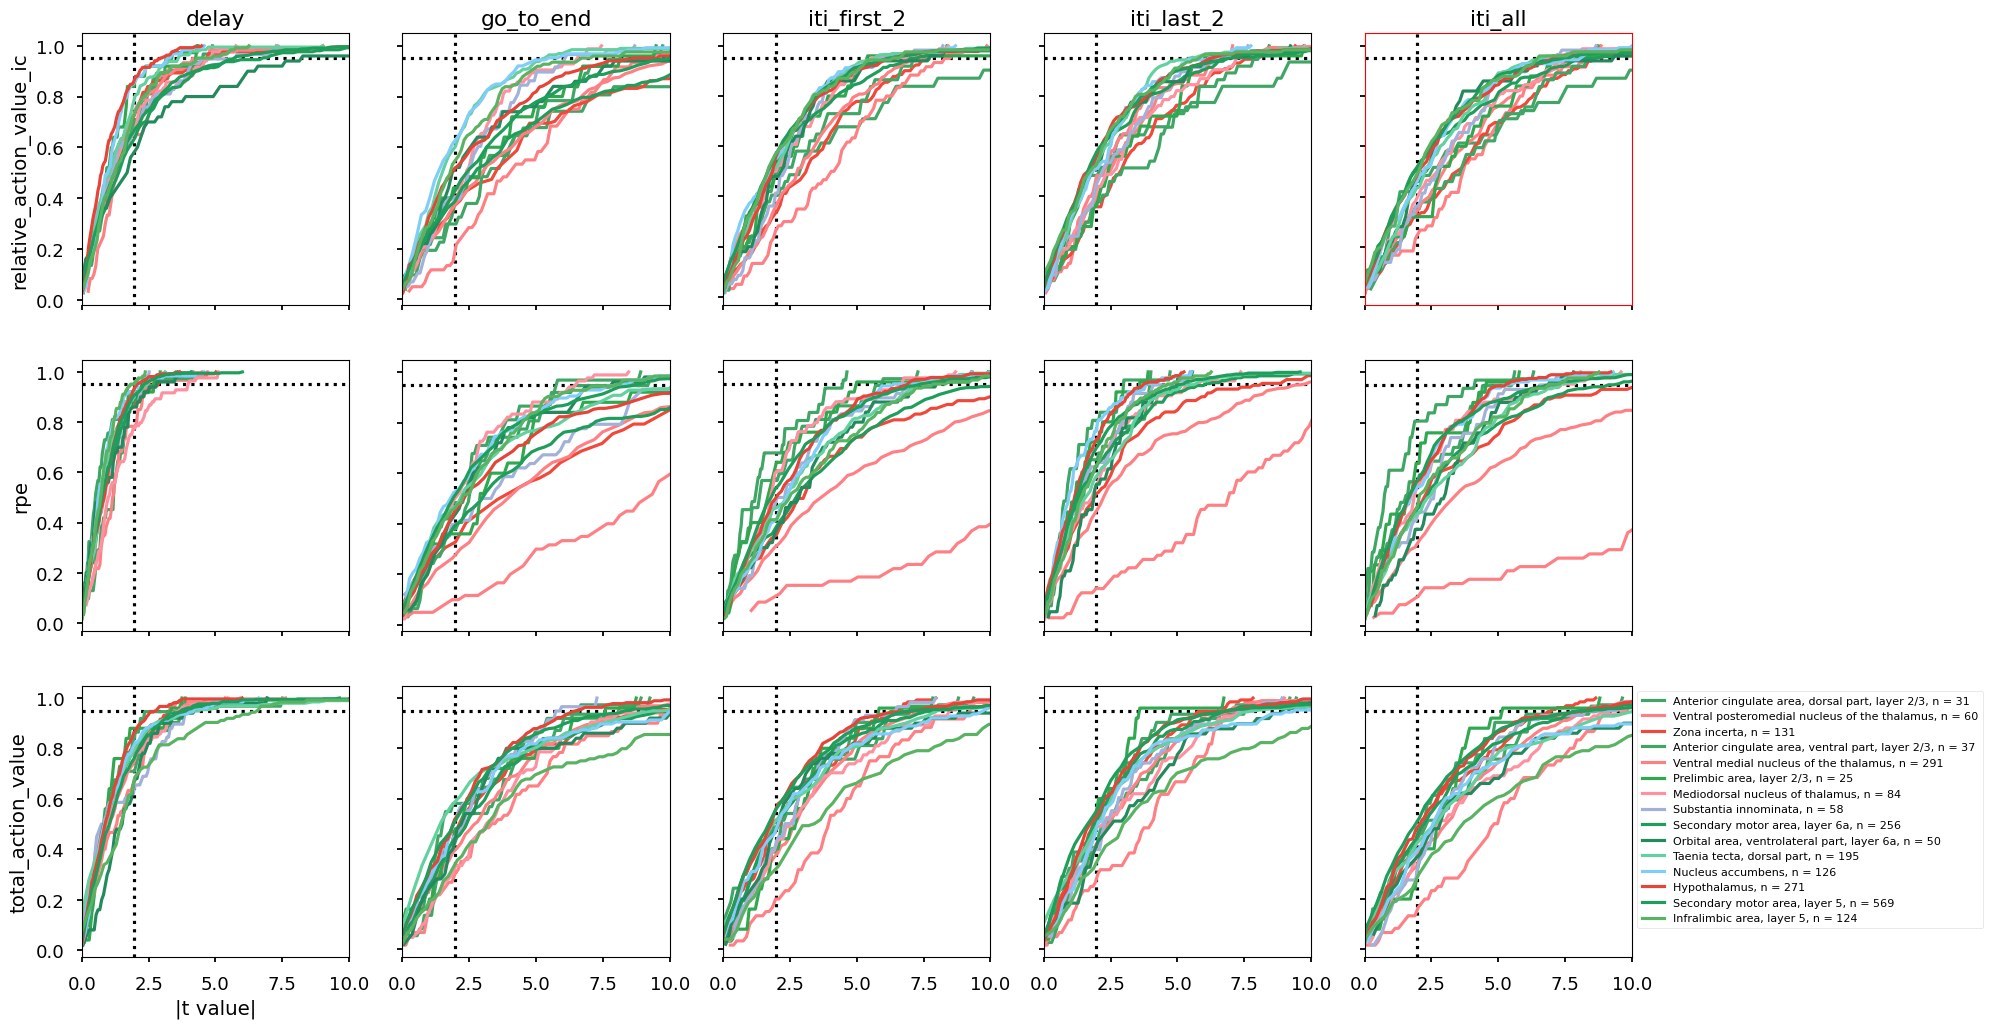

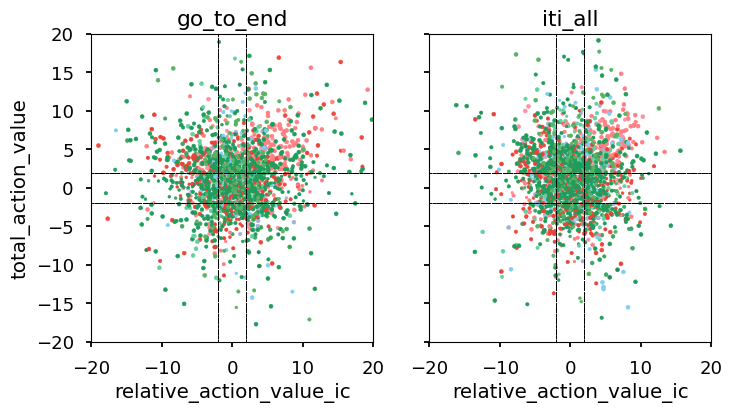

In [26]:
from pipeline.plot import unit_characteristic_plot
unit_characteristic_plot.plot_unit_period_fit(linear_model='Q_rel + Q_tot + rpe', order_by={'var_name': 'relative_action_value_ic', 'period': 'iti_all'}, first_n=15, min_num_unit=20, color='ccf')

define queries...
done!
plotting t-distributions
plotting weights distribution


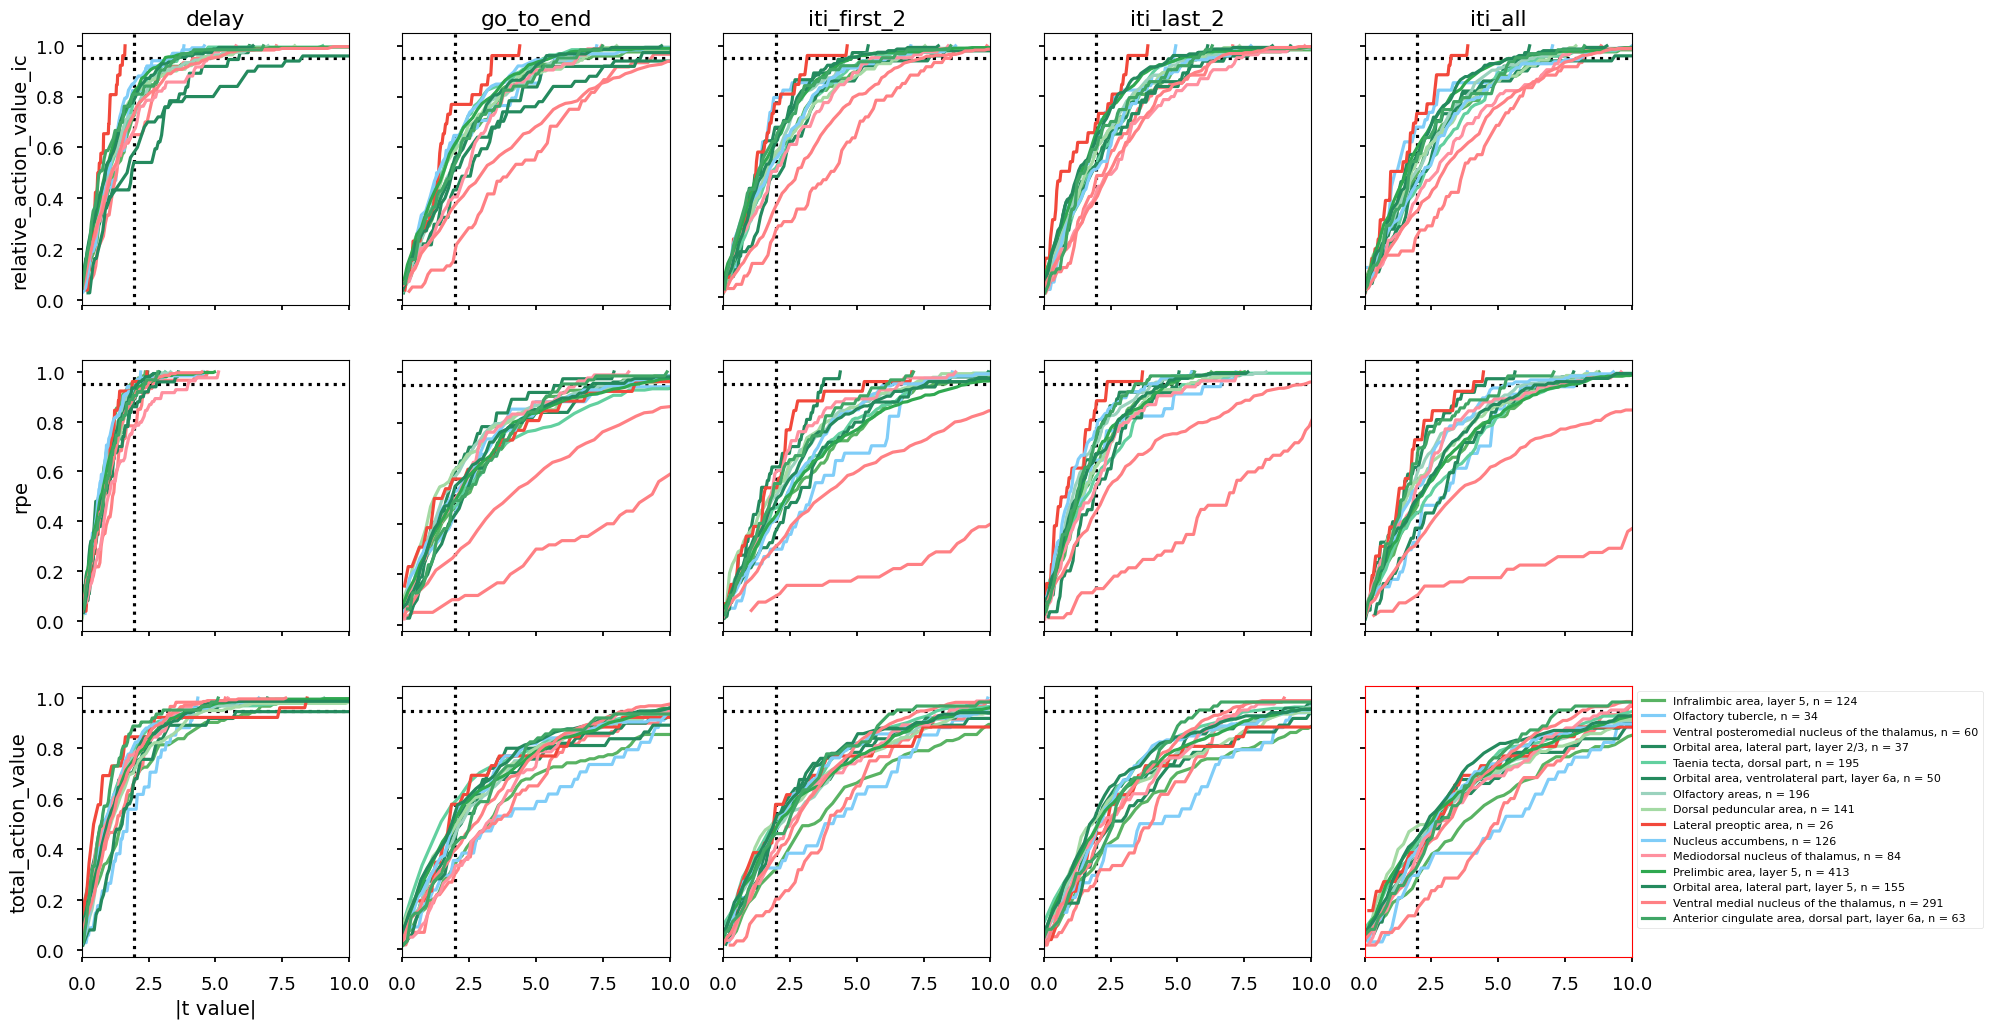

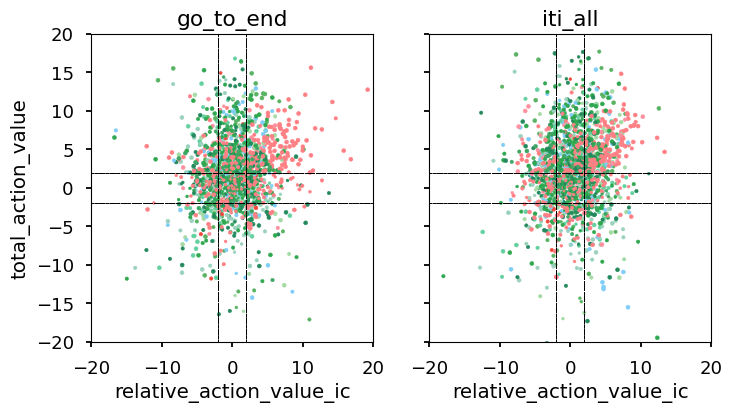

In [27]:
from pipeline.plot import unit_characteristic_plot
unit_characteristic_plot.plot_unit_period_fit(linear_model='Q_rel + Q_tot + rpe', order_by={'var_name': 'total_action_value', 'period': 'iti_all'}, first_n=15, min_num_unit=20, color='ccf')

define queries...
done!
plotting t-distributions
plotting weights distribution


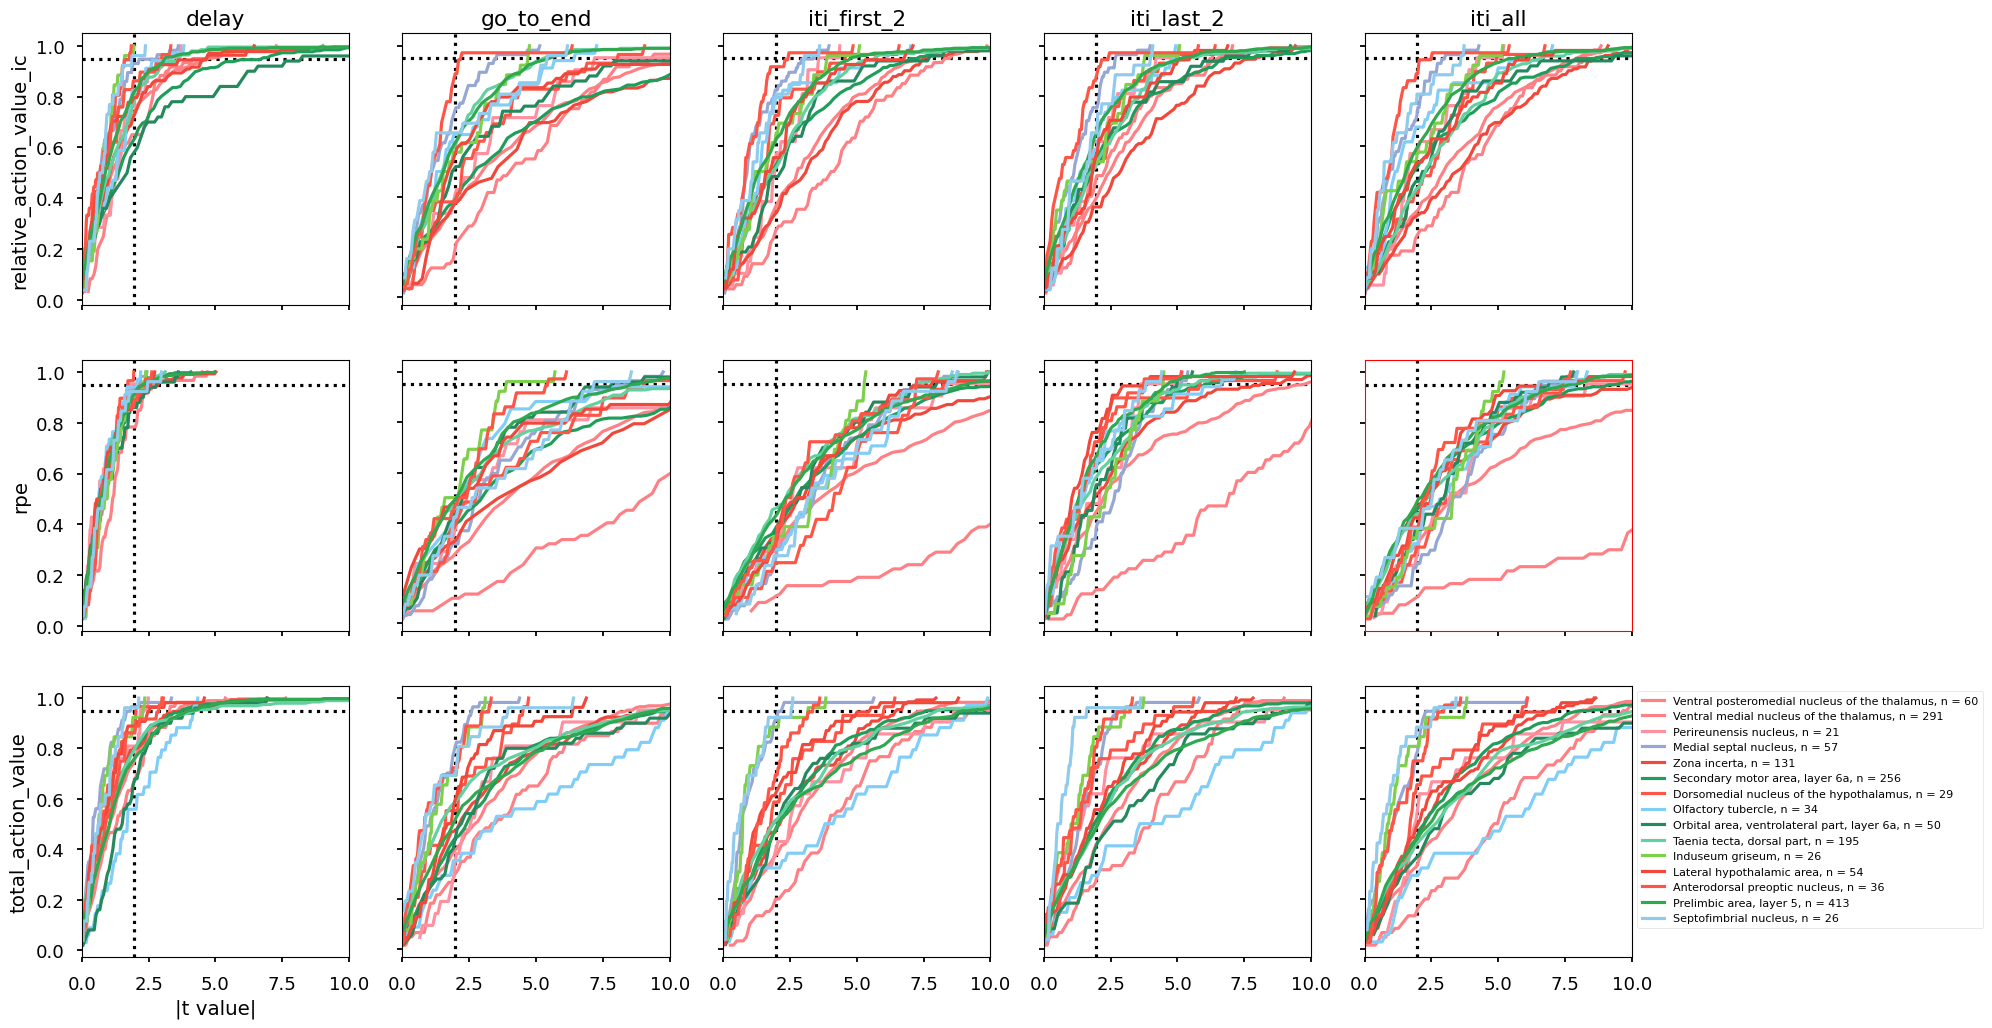

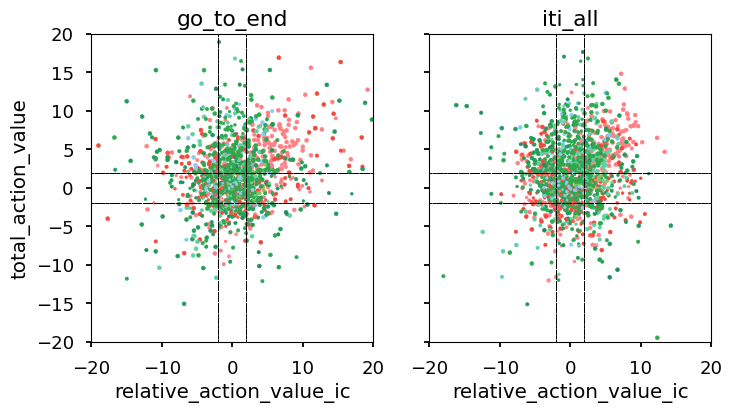

In [28]:
from pipeline.plot import unit_characteristic_plot
unit_characteristic_plot.plot_unit_period_fit(linear_model='Q_rel + Q_tot + rpe', order_by={'var_name': 'rpe', 'period': 'iti_all'}, first_n=15, min_num_unit=20, color='ccf')

In [83]:
area_order = dj.U('annotation').aggr(q_all & {'var_name': 'relative_action_value_ic', 'period': 'iti_all'}, area_aver='AVG(ABS(t))')
df_area = area_order.fetch(order_by='area_aver desc', format='frame')

In [93]:
df_area.reset_index()['annotation'][0]

'Central medial nucleus of the thalamus'

In [98]:
(ccf.CCFBrainRegion & f'region_name = "{df_area.reset_index()["annotation"][0]}"').fetch1('color_code')

'FF909F'

In [7]:
q_unit_n = dj.U('annotation').aggr(q_hist, area_num_units='count(*)')
q_unit_n

annotation,area_num_units calculated attribute
alveus,11
"Anterior cingulate area, dorsal part, layer 2/3",10
"Anterior cingulate area, dorsal part, layer 5",46
Anterior olfactory nucleus,124
Anterior pretectal nucleus,14
Bed nuclei of the stria terminalis,2
Caudoputamen,35
Central medial nucleus of the thalamus,6
"corpus callosum, anterior forceps",6
"corpus callosum, body",1


In [9]:
q_unit_n.fetch(order_by='area_num_units desc', format='frame')

,area_num_units
annotation,
"Secondary motor area, layer 5",144
Anterior olfactory nucleus,124
"Prelimbic area, layer 5",66
Hypothalamus,63
Ventral medial nucleus of the thalamus,63
...,...
"Retrosplenial area, dorsal part, layer 5",1
"Primary somatosensory area, upper limb, layer 6a",1
Dorsomedial nucleus of the hypothalamus,1


Check non-photostim Units without UnitPeriodLinearFit 

In [6]:
((ephys.Unit & foraging_sessions) - psth_foraging.UnitPeriodLinearFit) - experiment.PhotostimForagingTrial

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,unit,unit_uid unique across sessions/animals,unit_quality,probe_type e.g. neuropixels_1.0,electrode_config_name user friendly name,electrode_group electrode group,"electrode electrode index, starts at 0","unit_posx (um) estimated x position of the unit relative to probe's tip (0,0)","unit_posy (um) estimated y position of the unit relative to probe's tip (0,0)",spike_times (s) from the start of the first data point used in clustering,spike_sites array of electrode associated with each spike,spike_depths (um) array of depths associated with each spike,unit_amp,unit_snr,waveform average spike waveform
473361,48,1,kilosort2,0,0,multi,neuropixels 1.0 - 3B,1-384,0,3,11.0,20.0,=BLOB=,=BLOB=,=BLOB=,63.35717084639499,2.037323171136116,=BLOB=
473361,48,1,kilosort2,1,1,multi,neuropixels 1.0 - 3B,1-384,0,5,27.0,40.0,=BLOB=,=BLOB=,=BLOB=,46.06797680412372,1.4376379311450125,=BLOB=
473361,48,1,kilosort2,2,2,multi,neuropixels 1.0 - 3B,1-384,0,5,27.0,40.0,=BLOB=,=BLOB=,=BLOB=,68.86661664926929,2.085327217769442,=BLOB=
473361,48,1,kilosort2,3,3,multi,neuropixels 1.0 - 3B,1-384,0,5,27.0,40.0,=BLOB=,=BLOB=,=BLOB=,117.4679267288694,2.417756486213357,=BLOB=
473361,48,1,kilosort2,4,4,multi,neuropixels 1.0 - 3B,1-384,0,2,59.0,0.0,=BLOB=,=BLOB=,=BLOB=,69.3588689271255,2.593885954524757,=BLOB=
473361,48,1,kilosort2,5,5,multi,neuropixels 1.0 - 3B,1-384,0,3,11.0,20.0,=BLOB=,=BLOB=,=BLOB=,101.90127212389382,3.507763654357228,=BLOB=
473361,48,1,kilosort2,6,6,good,neuropixels 1.0 - 3B,1-384,0,5,27.0,40.0,=BLOB=,=BLOB=,=BLOB=,161.8863341968912,6.736960823547907,=BLOB=
473361,48,1,kilosort2,7,7,good,neuropixels 1.0 - 3B,1-384,0,6,59.0,40.0,=BLOB=,=BLOB=,=BLOB=,152.61616983967937,5.668397559322781,=BLOB=
473361,48,1,kilosort2,8,8,multi,neuropixels 1.0 - 3B,1-384,0,6,59.0,40.0,=BLOB=,=BLOB=,=BLOB=,93.28125,3.4395767898243683,=BLOB=
473361,48,1,kilosort2,9,9,good,neuropixels 1.0 - 3B,1-384,0,6,59.0,40.0,=BLOB=,=BLOB=,=BLOB=,53.60054347826087,2.2710418238493992,=BLOB=


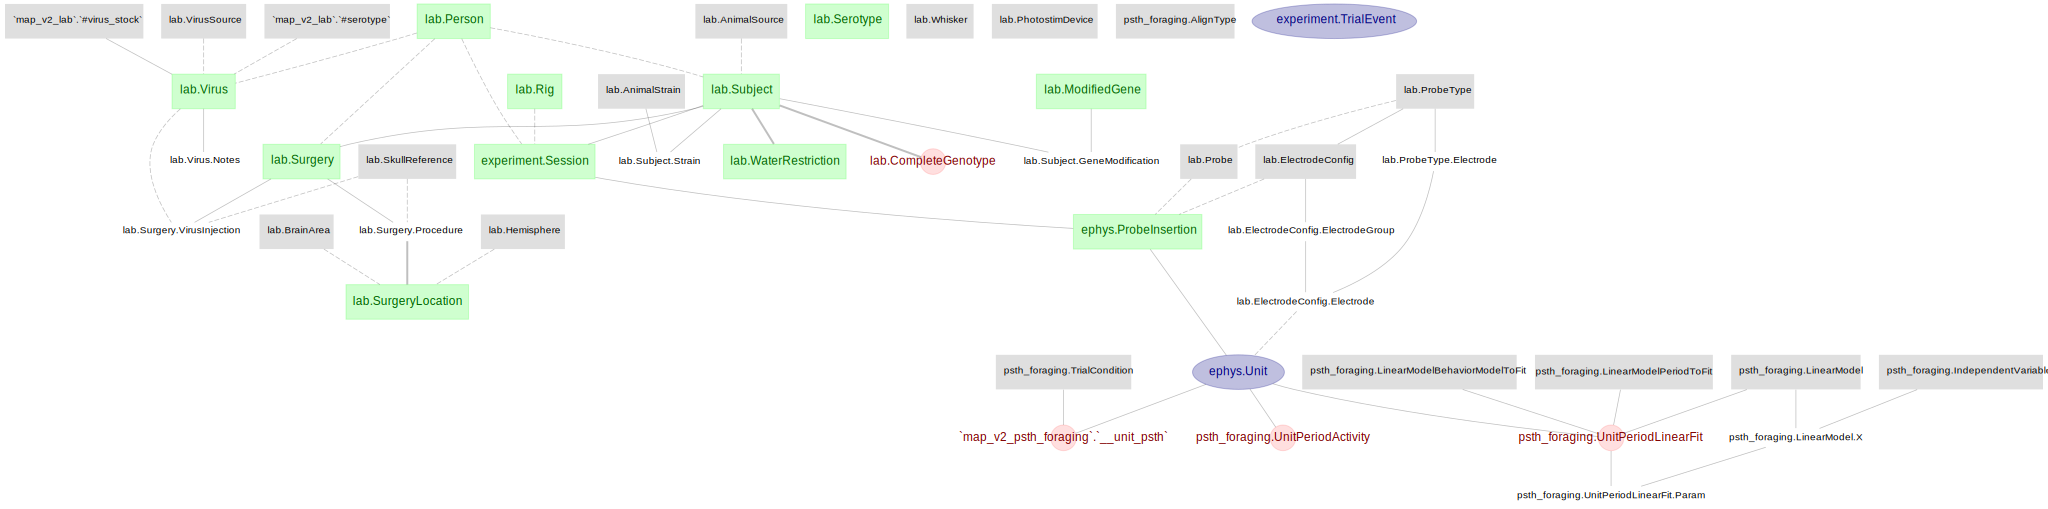

In [7]:
import datajoint as dj
dj.ERD(ephys.ProbeInsertion) + dj.ERD(psth_foraging) + dj.ERD(experiment.TrialEvent) + dj.ERD(lab)

## Debug UnitLinearFit for {'subject_id': 473361, 'session': 48}

In [9]:
keys = (ephys.Unit & foraging_analysis.SessionTaskProtocol - experiment.PhotostimForagingTrial & {'subject_id': 473361, 'session': 48}) * psth_foraging.LinearModelPeriodToFit * psth_foraging.LinearModelBehaviorModelToFit * psth_foraging.LinearModel

In [50]:
keys = (ephys.Unit & foraging_analysis.SessionTaskProtocol - experiment.PhotostimForagingTrial & {'subject_id': 473361, 'session': 46}) * psth_foraging.LinearModelPeriodToFit * psth_foraging.LinearModelBehaviorModelToFit * psth_foraging.LinearModel

In [65]:
key = keys.fetch('KEY', limit=1)[0]

In [66]:
key

{'subject_id': 473361,
 'session': 46,
 'insertion_number': 1,
 'clustering_method': 'kilosort2',
 'unit': 0,
 'period': 'before_2',
 'behavior_model': 'best_aic',
 'multi_linear_model': 'Q_c + Q_i + rpe'}

In [53]:
from pipeline.util import _get_unit_independent_variable
import statsmodels.api as sm

In [93]:
# -- Fetech data --
period, behavior_model = key['period'], key['behavior_model']

# Parse period
# No longer need this because it has been handled during UnitPeriodActivity
# if period in ['delay'] and not ephys.TrialEvent & key & 'trial_event_type = "zaberready"':
#     period = period + '_bitcode'  # Manually correction of bitcodestart to zaberready, if necessary

# Parse behavioral model_id
if behavior_model.isnumeric():
    model_id = int(behavior_model)
else:
    model_id = (foraging_model.FittedSessionModelComparison.BestModel &
                key & 'model_comparison_idx=0').fetch1(behavior_model)

# Parse independent variable
independent_variables = (psth_foraging.LinearModel.X & key).fetch('var_name')
if_intercept = (psth_foraging.LinearModel & key).fetch1('if_intercept')

# Get data
#  period_activity = compute_unit_period_activity(key, period)
period_activity = (psth_foraging.UnitPeriodActivity & key & {'period': period}).fetch1('trial', 'firing_rates')

all_iv = _get_unit_independent_variable(key, model_id=model_id)

# TODO Align ephys event with behavior using bitcode! (and save raw bitcodes)
trial = all_iv.trial  # Without ignored trials
trial_with_ephys = trial <= max(period_activity[0])
trial = trial[trial_with_ephys]  # Truncate behavior trial to max ephys length (this assumes the first trial is aligned, see ingest.ephys)
all_iv = all_iv[trial_with_ephys]  # Also truncate all ivs
firing = period_activity[1][trial - 1]  # Align ephys trial and model trial (e.g., no ignored trials in model fitting)

# -- Fit --
y = pd.DataFrame({f'{period} firing': firing})
x = all_iv[independent_variables].astype(float)

model = sm.OLS(y, sm.add_constant(x) if if_intercept else x)
model_fit = model.fit()

    

In [99]:
all_iv = _get_unit_independent_variable(key, model_id=model_id)

In [100]:
all_iv

,trial,subject_id,session,model_id,left_,right_,contra_,ipsi_,left_action_value,right_action_value,contra_action_value,ipsi_action_value,left_choice_prob,right_choice_prob,contra_choice_prob,ipsi_choice_prob,left_choice_kernel,right_choice_kernel,contra_choice_kernel,ipsi_choice_kernel,relative_action_value_lr,relative_action_value_ic,total_action_value,choice,choice_lr,choice_ic,outcome,reward,rpe
0,1,473361,46,15,left,right,right,left,0.647380,0.000000,0.000000,0.647380,0.907875,0.092125,0.092125,0.907875,0.873491,0.000000,0.000000,0.873491,-0.64738,-0.64738,0.64738,left,0,0,hit,1,1.0
1,2,473361,46,15,left,right,right,left,0.228279,0.000000,0.000000,0.228279,0.861201,0.138800,0.138800,0.861201,0.983995,0.000000,0.000000,0.983995,-0.228279,-0.228279,0.228279,left,0,0,miss,0,-0.64738
2,3,473361,46,15,left,right,right,left,0.080496,0.000000,0.000000,0.080496,0.838272,0.161728,0.161728,0.838272,0.997975,0.000000,0.000000,0.997975,-0.080496,-0.080496,0.080496,left,0,0,miss,0,-0.228279
3,4,473361,46,15,left,right,right,left,0.028384,0.000000,0.000000,0.028384,0.829189,0.170811,0.170811,0.829189,0.999744,0.000000,0.000000,0.999744,-0.028384,-0.028384,0.028384,left,0,0,miss,0,-0.080496
4,5,473361,46,15,left,right,right,left,0.028384,0.647380,0.647380,0.028384,0.396968,0.603032,0.603032,0.396968,0.126477,0.873491,0.873491,0.126477,0.618996,0.618996,0.675765,right,1,1,hit,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,337,473361,46,15,left,right,right,left,0.967869,0.652392,0.652392,0.967869,0.685340,0.314660,0.314660,0.685340,0.126505,0.873495,0.873495,0.126505,-0.315477,-0.315477,1.620261,left,0,0,miss,0,-0.967869
296,338,473361,46,15,left,right,right,left,0.341290,0.652392,0.652392,0.341290,0.730557,0.269443,0.269443,0.730557,0.889495,0.110505,0.110505,0.889495,0.311103,0.311103,0.993682,None,None,None,ignore,0,NaN
297,340,473361,46,15,left,right,right,left,0.767726,0.652392,0.652392,0.767726,0.841932,0.158068,0.158068,0.841932,0.986020,0.013980,0.013980,0.986020,-0.115333,-0.115333,1.420118,None,None,None,ignore,0,NaN
298,347,473361,46,15,left,right,right,left,0.767726,0.230046,0.230046,0.767726,0.742800,0.257200,0.257200,0.742800,0.124741,0.875259,0.875259,0.124741,-0.537679,-0.537679,0.997772,None,None,None,ignore,0,NaN


In [80]:
trial

0        1
1        2
2        3
3        4
4        5
      ... 
273    302
274    305
275    306
276    307
277    308
Name: trial, Length: 278, dtype: int64

In [79]:
x

,contra_action_value,ipsi_action_value,rpe
0,0.000000,0.647380,1.000000
1,0.000000,0.228279,-0.647380
2,0.000000,0.080496,-0.228279
3,0.000000,0.028384,-0.080496
4,0.647380,0.028384,1.000000
...,...,...,...
273,0.989532,0.003968,0.029687
274,0.989532,0.648780,0.996032
275,0.989532,0.228772,-0.648780
276,0.996309,0.228772,0.010468


In [55]:
q_latent_variable_all = dj.U('trial') & q_latent_variable

In [72]:
    unit_key = key
    hemi = 'left'
    
    contra, ipsi = ['right', 'left'] if hemi == 'left' else ['left', 'right']

    # Get latent variables from model fitting
    q_latent_variable = (foraging_model.FittedSessionModel.TrialLatentVariable
                         & unit_key
                         & {'model_id': model_id})

    # Flatten latent variables to generate columns like 'left_action_value', 'right_choice_prob'
    latent_variables = q_latent_variable.heading.secondary_attributes
    q_latent_variable_all = dj.U('trial') & q_latent_variable
    for lv in latent_variables:
        for prefix, side in zip(['left_', 'right_', 'contra_', 'ipsi_'],
                                ['left', 'right', contra, ipsi]):
            # Better way here?
            q_latent_variable_all *= eval(f"(q_latent_variable & {{'water_port': '{side}'}}).proj({prefix}{lv}='{lv}', {prefix}='water_port')")

    # Add relative and total value

In [69]:
    q_latent_variable_all = q_latent_variable_all.proj(...,
                                                       relative_action_value_lr='right_action_value - left_action_value',
                                                       relative_action_value_ic='contra_action_value - ipsi_action_value',
                                                       total_action_value='contra_action_value + ipsi_action_value')

    # Add choice
    q_independent_variable = (q_latent_variable_all * experiment.WaterPortChoice).proj(...,
                                                                                       choice='water_port',
                                                                                       choice_lr='water_port="right"',
                                                                                       choice_ic=f'water_port="{contra}"')

    # Add reward
    q_independent_variable = (q_independent_variable * experiment.BehaviorTrial.proj('outcome')).proj(...,
                                                                                                       reward='outcome="hit"'
                                                                                                       )

    df = q_independent_variable.fetch(format='frame', order_by='trial').reset_index()

In [58]:
key = {'subject_id': 473360, 'session': 49}

## Check for consistency: non-ignore trials

In [18]:
from pipeline.foraging_model import get_session_history

check_keys = (foraging_sessions & foraging_model.FittedSessionModel).fetch('KEY')

check_non_ignore_trial = pd.DataFrame(columns = ['key', 'gsh_wpc', 'gsh_lv'])

for key in check_keys:
    _, _, _, _, q_non_ignore_trial = get_session_history(key)
    non_ignore_from_get_session_history = q_non_ignore_trial.fetch('trial', order_by='trial')
    non_ignore_from_latent_variable = (dj.U('trial') & (foraging_model.FittedSessionModel.TrialLatentVariable & key)).fetch('trial', order_by='trial')
    non_ignore_from_waterportchoice = (experiment.WaterPortChoice & key & 'water_port IS NOT NULL').fetch('trial', order_by='trial')
    
    gsh_wpc = np.array_equal(non_ignore_from_get_session_history, non_ignore_from_waterportchoice)
    gsh_lv = np.array_equal(non_ignore_from_get_session_history, non_ignore_from_latent_variable)
    
    key.update({'h2o': (lab.WaterRestriction & key).fetch1('water_restriction_number')})
    
    check_non_ignore_trial = check_non_ignore_trial.append({'key': key, 'gsh_wpc': gsh_wpc, 'gsh_lv': gsh_lv}, ignore_index=True)

In [69]:
pd.set_option('display.max_colwidth', None, 'display.width', None, 'display.max_rows', 50)

In [56]:
check_non_ignore_trial.query('gsh_lv == False')

ValueError: Value must be a nonnegative integer or None

Ephys session only

In [34]:
from pipeline.foraging_model import get_session_history

check_keys = (foraging_sessions & foraging_model.FittedSessionModel & ephys.ProbeInsertion).fetch('KEY')

check_non_ignore_trial = pd.DataFrame(columns = ['key', 'gsh_wpc', 'gsh_lv'])

for key in check_keys:
    _, _, _, _, q_non_ignore_trial = get_session_history(key)
    non_ignore_from_get_session_history = q_non_ignore_trial.fetch('trial', order_by='trial')
    non_ignore_from_latent_variable = (dj.U('trial') & (foraging_model.FittedSessionModel.TrialLatentVariable & key)).fetch('trial', order_by='trial')
    non_ignore_from_waterportchoice = (experiment.WaterPortChoice & key & 'water_port IS NOT NULL').fetch('trial', order_by='trial')
    
    gsh_wpc = np.array_equal(non_ignore_from_get_session_history, non_ignore_from_waterportchoice)
    gsh_lv = np.array_equal(non_ignore_from_get_session_history, non_ignore_from_latent_variable)
    
    key.update({'h2o': (lab.WaterRestriction & key).fetch1('water_restriction_number')})
    
    check_non_ignore_trial = check_non_ignore_trial.append({'key': key, 'gsh_wpc': gsh_wpc, 'gsh_lv': gsh_lv}, ignore_index=True)

In [35]:
pd.set_option('display.max_colwidth', -1, 'display.width', 1000, 'display.max_rows',1000)

check_non_ignore_trial.query('gsh_lv == False')

,key,gsh_wpc,gsh_lv
6,"{'subject_id': 473361, 'session': 46, 'h2o': 'HH09'}",True,False
8,"{'subject_id': 473361, 'session': 48, 'h2o': 'HH09'}",True,False


## Fix {HH09, session 48}

In [109]:
key = {'subject_id': 473361, 'session': 48, 'h2o': 'HH09'}
(foraging_model.FittedSessionModel & key).delete()

[2022-11-17 02:27:31,200][INFO]: Deleting 114 rows from `map_v2_foraging_model`.`__fitted_session_model__param`
[2022-11-17 02:27:31,451][INFO]: Deleting 9256 rows from `map_v2_foraging_model`.`__fitted_session_model__trial_latent_variable`
[2022-11-17 02:27:31,474][INFO]: Deleting 26 rows from `map_v2_foraging_model`.`__fitted_session_model`


Commit deletes? [yes, No]:  yes


Deletes committed.


26

In [111]:
(foraging_model.FittedSessionModelComparison & key).delete()

[2022-11-17 02:28:21,209][INFO]: Deleting 3 rows from `map_v2_foraging_model`.`__fitted_session_model_comparison__best_model`
[2022-11-17 02:28:21,243][INFO]: Deleting 51 rows from `map_v2_foraging_model`.`__fitted_session_model_comparison__relative_stat`
[2022-11-17 02:28:21,264][INFO]: Deleting 3 rows from `map_v2_foraging_model`.`__fitted_session_model_comparison`


Commit deletes? [yes, No]:  yes


Deletes committed.


3

In [ ]:
foraging_model.FittedSessionModel.populate(key, display_progress=True)

FittedSessionModel:  85%|████████▍ | 22/26 [16:01<01:39, 24.96s/it]

In [ ]:
foraging_model.FittedSessionModelComparison.populate(key, display_progress=True)

In [ ]:
dj.U('subject_id', 'session') & (psth_foraging.UnitPeriodLinearFit.key_source - psth_foraging.UnitPeriodLinearFit)

Done in parallel elsewhere: populating `psth_foraging.UnitPeriodLinearFit`

## Recheck {HH09, session 48}

In [ ]:
from pipeline.foraging_model import get_session_history

check_keys = (foraging_sessions & foraging_model.FittedSessionModel & ephys.ProbeInsertion).fetch('KEY')

check_non_ignore_trial = pd.DataFrame(columns = ['key', 'gsh_wpc', 'gsh_lv'])

for key in check_keys:
    _, _, _, _, q_non_ignore_trial = get_session_history(key)
    non_ignore_from_get_session_history = q_non_ignore_trial.fetch('trial', order_by='trial')
    non_ignore_from_latent_variable = (dj.U('trial') & (foraging_model.FittedSessionModel.TrialLatentVariable & key)).fetch('trial', order_by='trial')
    non_ignore_from_waterportchoice = (experiment.WaterPortChoice & key & 'water_port IS NOT NULL').fetch('trial', order_by='trial')
    
    gsh_wpc = np.array_equal(non_ignore_from_get_session_history, non_ignore_from_waterportchoice)
    gsh_lv = np.array_equal(non_ignore_from_get_session_history, non_ignore_from_latent_variable)
    
    key.update({'h2o': (lab.WaterRestriction & key).fetch1('water_restriction_number')})
    
    check_non_ignore_trial = check_non_ignore_trial.append({'key': key, 'gsh_wpc': gsh_wpc, 'gsh_lv': gsh_lv}, ignore_index=True)

# Behavior QC

In [29]:
import pandas as pd

from pipeline import experiment, lab, ephys, foraging_analysis
import datajoint as dj

foraging_ephys_no_photostim = (experiment.Session * lab.WaterRestriction.proj('water_restriction_number') 
                                & (foraging_analysis.SessionTaskProtocol & 'session_task_protocol = 100')
                                & ephys.ProbeInsertion - experiment.PhotostimForagingTrial)

session_qc = 'trial_number > 300 AND foraging_efficiency > 0.75'  # An arbitrary QC for trial number and performance
foraging_sess_qc = (foraging_ephys_no_photostim 
                           & (foraging_analysis.SessionStats.proj(trial_number='session_pure_choices_num', 
                                                                foraging_efficiency='session_foraging_eff_optimal_random_seed') 
                             & session_qc)
                          )
foraging_sess_qc

subject_id institution 6 digit animal ID,session session number,session_date,session_time,username,rig,water_restriction_number WR number
473360,49,2021-08-12,16:52:05,HH,Ephys-Han,HH08
473360,50,2021-08-13,16:33:03,HH,Ephys-Han,HH08
473360,51,2021-08-14,18:08:26,HH,Ephys-Han,HH08
473360,52,2021-08-15,18:19:35,HH,Ephys-Han,HH08
473361,47,2021-04-18,23:00:03,HH,Ephys-Han,HH09
473361,57,2021-06-09,16:28:15,HH,Ephys-Han,HH09
473361,59,2021-06-12,14:18:29,HH,Ephys-Han,HH09
473361,60,2021-06-13,20:27:10,HH,Ephys-Han,HH09
482353,33,2021-11-02,17:05:06,HH,Ephys-Han,HH13
482353,34,2021-11-03,16:49:36,HH,Ephys-Han,HH13


# Ephys QC

In [104]:
qc_criteria = {
    'before': 'presence_ratio > 0.9 '
              'AND amplitude_cutoff < 0.1 '
              'AND isi_violation < 0.5 '
              'AND unit_amp > 70',
    'minimal': 'unit_amp > 70 '
               'AND avg_firing_rate > 0.1 '
               'AND presence_ratio > 0.9 '
               'AND isi_violation < 0.1 '
               'AND amplitude_cutoff < 0.15',
    'Medulla': 'unit_amp > 150 '
               'AND avg_firing_rate > 0.2 '
               'AND presence_ratio > 0.9 '
               'AND isi_violation < 10 '
               'AND amplitude_cutoff < 0.15',
    'ALM': 'unit_amp > 100 '
           'AND avg_firing_rate > 0.2 '
           'AND presence_ratio > 0.95 '
           'AND isi_violation < 0.1 '
           'AND amplitude_cutoff < 0.1',
    'Midbrain': 'unit_amp > 100 '
                'AND avg_firing_rate > 0.1 '
                'AND presence_ratio > 0.9 '
                'AND isi_violation < 1 '
                'AND amplitude_cutoff < 0.08',
    'Thalamus': 'unit_amp > 90 '
                'AND avg_firing_rate > 0.1 '
                'AND presence_ratio > 0.9 '
                'AND isi_violation < 0.05 '
                'AND amplitude_cutoff < 0.08',
    'Striatum': 'unit_amp > 70 '
                'AND avg_firing_rate > 0.1 '
                'AND presence_ratio > 0.9 '
                'AND isi_violation < 0.5 '
                'AND amplitude_cutoff < 0.1'
}

In [30]:
q_unit_foraging = ephys.Unit & foraging_analysis.SessionTaskProtocol
total = len(q_unit_foraging)

for qc in qc_criteria:
    qced = q_unit_foraging * ephys.ClusterMetric * ephys.UnitStat & qc_criteria[qc]
    qced_add_behavior = qced & foraging_sess_qc
    print(f'{qc}: {len(qced)}, {len(qced)/total:.2%} --> after behavior qc --> {len(qced_add_behavior)}, {len(qced_add_behavior)/total:.2%}')

before: 11311, 28.69% --> after behavior qc --> 6619, 16.79%
minimal: 8872, 22.51% --> after behavior qc --> 5191, 13.17%
Medulla: 4490, 11.39% --> after behavior qc --> 2499, 6.34%
ALM: 5745, 14.57% --> after behavior qc --> 3398, 8.62%
Midbrain: 7879, 19.99% --> after behavior qc --> 4564, 11.58%
Thalamus: 5935, 15.06% --> after behavior qc --> 3492, 8.86%
Striatum: 11253, 28.55% --> after behavior qc --> 6573, 16.67%


In [5]:
unit_beh_qc = (q_unit_foraging * ephys.ClusterMetric * ephys.UnitStat) & qc_criteria['minimal'] & foraging_sess_qc
unit_beh_qc = unit_beh_qc * histology.ElectrodeCCFPosition.ElectrodePosition * ccf.CCFAnnotation

Customized area LUT

In [102]:
# check session stats for a region
# fetch data from brain region
region_ann_lut = {
    # premotor
    'ALM': ["Secondary motor area%"],
    
    # isocortex, PFC
    'PL': ["Prelimbic%"],
    'ACA': ["Anterior cingulate area%"],
    'ILA': ["Infralimbic%"],
    'ORB': ['%orbital%'],
    # 'FRP': '%frontal%',
    'RSP': ["Retrosplenial area%"],
    
    # thalamus
    'VM': ['Ventral medial%'],
    'MD': ['Mediodorsal%'],
    'VPM': ['Ventral posteromedial%'],
    'HY': ['Hypothalamus', 'Zona %'],
    
    # striatum
    'LSN': ["Lateral septal nucleus%"],
    'STRd': ["Caudoputamen%"],
    'STRv': ["Nucleus accumbens%", "Fundus%"],
    'striatum': ["striatum%"],
    
    # Pallidum
    'PALv': ["Substantia innominata%", "Magnocellular%"],
    
    # Olfactory
    'OLF': ["%olfactory%"],
}

In [31]:
# region = 'ALM'
# region_annotation = region_ann_lut[region]
# session_stats_in_region(all_unit_qc, region_annotation)

for region, areas in region_ann_lut.items():
    q_string = ' OR '.join([f'annotation LIKE "{s}"' for s in areas])
    q_unit_this_region = unit_beh_qc & q_string
    q_unit_in_sub_regions = (dj.U('annotation') & q_unit_this_region).aggr(unit_beh_qc, count='COUNT(*)')
    print(f'{region}: total {len(q_unit_this_region)}')
    print(q_unit_in_sub_regions)
    

ALM: total 584
*annotation                    count    
+----------------------------+ +-------+
Secondary motor area, layer 1  27       
Secondary motor area, layer 2/ 128      
Secondary motor area, layer 5  270      
Secondary motor area, layer 6a 159      
 (Total: 4)

PL: total 202
*annotation                   count    
+---------------------------+ +-------+
Prelimbic area, layer 2/3     13       
Prelimbic area, layer 5       146      
Prelimbic area, layer 6a      43       
 (Total: 3)

ACA: total 343
*annotation                    count    
+----------------------------+ +-------+
Anterior cingulate area, dorsa 21       
Anterior cingulate area, dorsa 152      
Anterior cingulate area, dorsa 26       
Anterior cingulate area, ventr 39       
Anterior cingulate area, ventr 2        
Anterior cingulate area, ventr 25       
Anterior cingulate area, ventr 78       
 (Total: 7)

ILA: total 42
*annotation                    count    
+----------------------------+ +-------+
Infral

Without `foraging_sess_qc`

define queries...
done!
plotting t-distributions


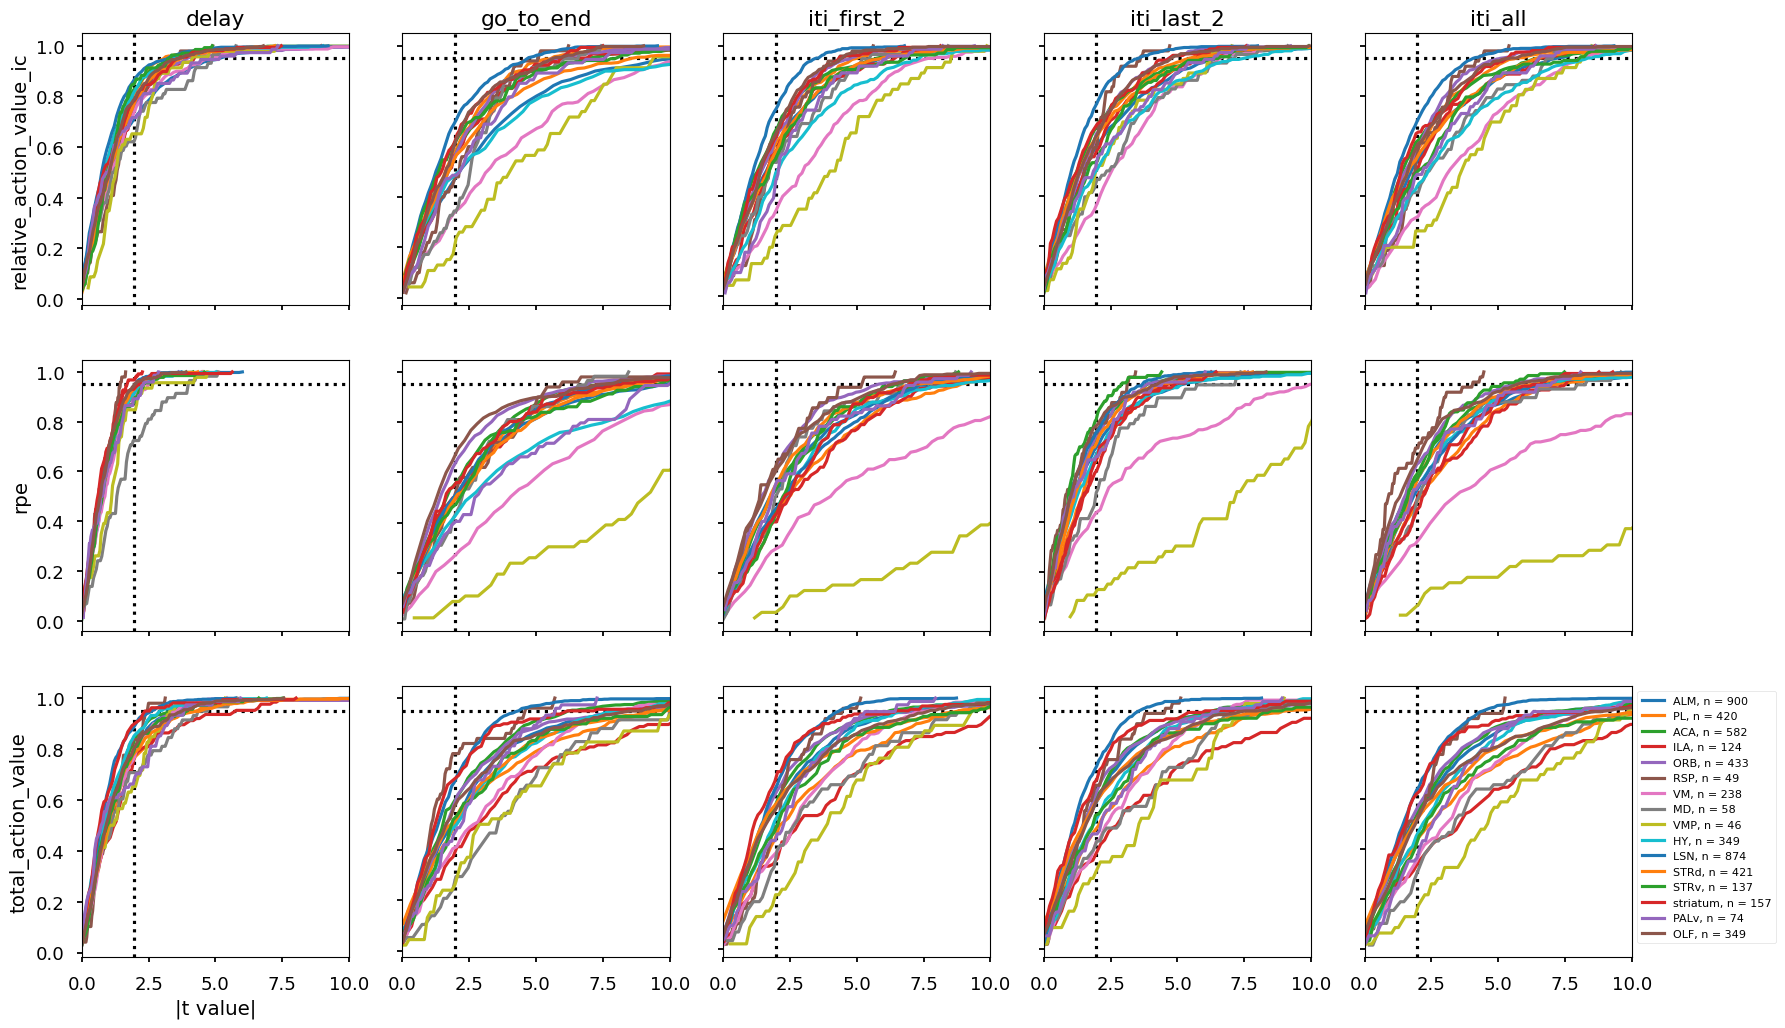

In [34]:
  
    foraging_sess = foraging_analysis.SessionTaskProtocol & 'session_task_protocol = 100'
    linear_model='Q_rel + Q_tot + rpe'
    epochs = ['delay', 'go_to_end', 'iti_first_2', 'iti_last_2', 'iti_all']
    color=''
    
    
    # linear_model='Q_c + Q_i + rpe'
    print('define queries...')
    q_unit = (((ephys.Unit & foraging_sess) 
               * ephys.ClusterMetric * ephys.UnitStat)
               #* (psth_foraging.UnitPeriodLinearFit * psth_foraging.UnitPeriodLinearFit.Param & {'multi_linear_model': linear_model}))
              & qc_criteria['minimal']
              )

    q_hist = (q_unit * histology.ElectrodeCCFPosition.ElectrodePosition) * ccf.CCFAnnotation & psth_foraging.UnitPeriodLinearFit
    q_unit_n = dj.U('annotation').aggr(q_hist, area_num_units='count(*)')
    q_hist *= q_unit_n

    lvs = (psth_foraging.LinearModel.X & {'multi_linear_model': linear_model}).fetch('var_name')
    q_all = ((psth_foraging.UnitPeriodLinearFit
              * psth_foraging.UnitPeriodLinearFit.Param
              * q_hist)
              & {'multi_linear_model': linear_model})   
    print('done!')

    # -- t distribution --
    fig, axs = plt.subplots(len(lvs), len(epochs), figsize=(4*len(epochs), 4*len(lvs)))
    
    # Areas that have most number of neurons
    print('plotting t-distributions')
    
    # plt.set_cmap("tab20")
    colors = plt.cm.tab20(np.linspace(0,1,20))
        
    for i, lv in enumerate(lvs):
        for j, ep in enumerate(epochs):
            ax = axs[i, j]
            
            ax.axhline(y=0.95, color='k', linestyle=':')
            ax.axvline(x=1.96, color='k', linestyle=':')
            
            for cc, (region, areas) in enumerate(region_ann_lut.items()):
                q_area_string = ' OR '.join([f'annotation LIKE "{s}"' for s in areas])
                this_ts = (q_all & {'var_name': lv, 'period': ep} & q_area_string).fetch('t')
                this_ts = this_ts[~np.isnan(this_ts)]
                
                values, bin = np.histogram(np.abs(this_ts), 100)
                ax.plot(bin[:-1], np.cumsum(values)/len(this_ts), label=f'{region}, n = {len(this_ts)}',)
                        # color=colors[cc])

            ax.set(xlim=(0, 10))
            ax.label_outer()

            if i == 0:
                ax.set_title(ep)
            if j == 0:
                ax.set_ylabel(lv)
            if i == len(lvs) - 1 and j == 0:
                ax.set_xlabel('|t value|')
                
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=8)

#%%

With `foraging_sess_qc`

define queries...
done!
plotting t-distributions


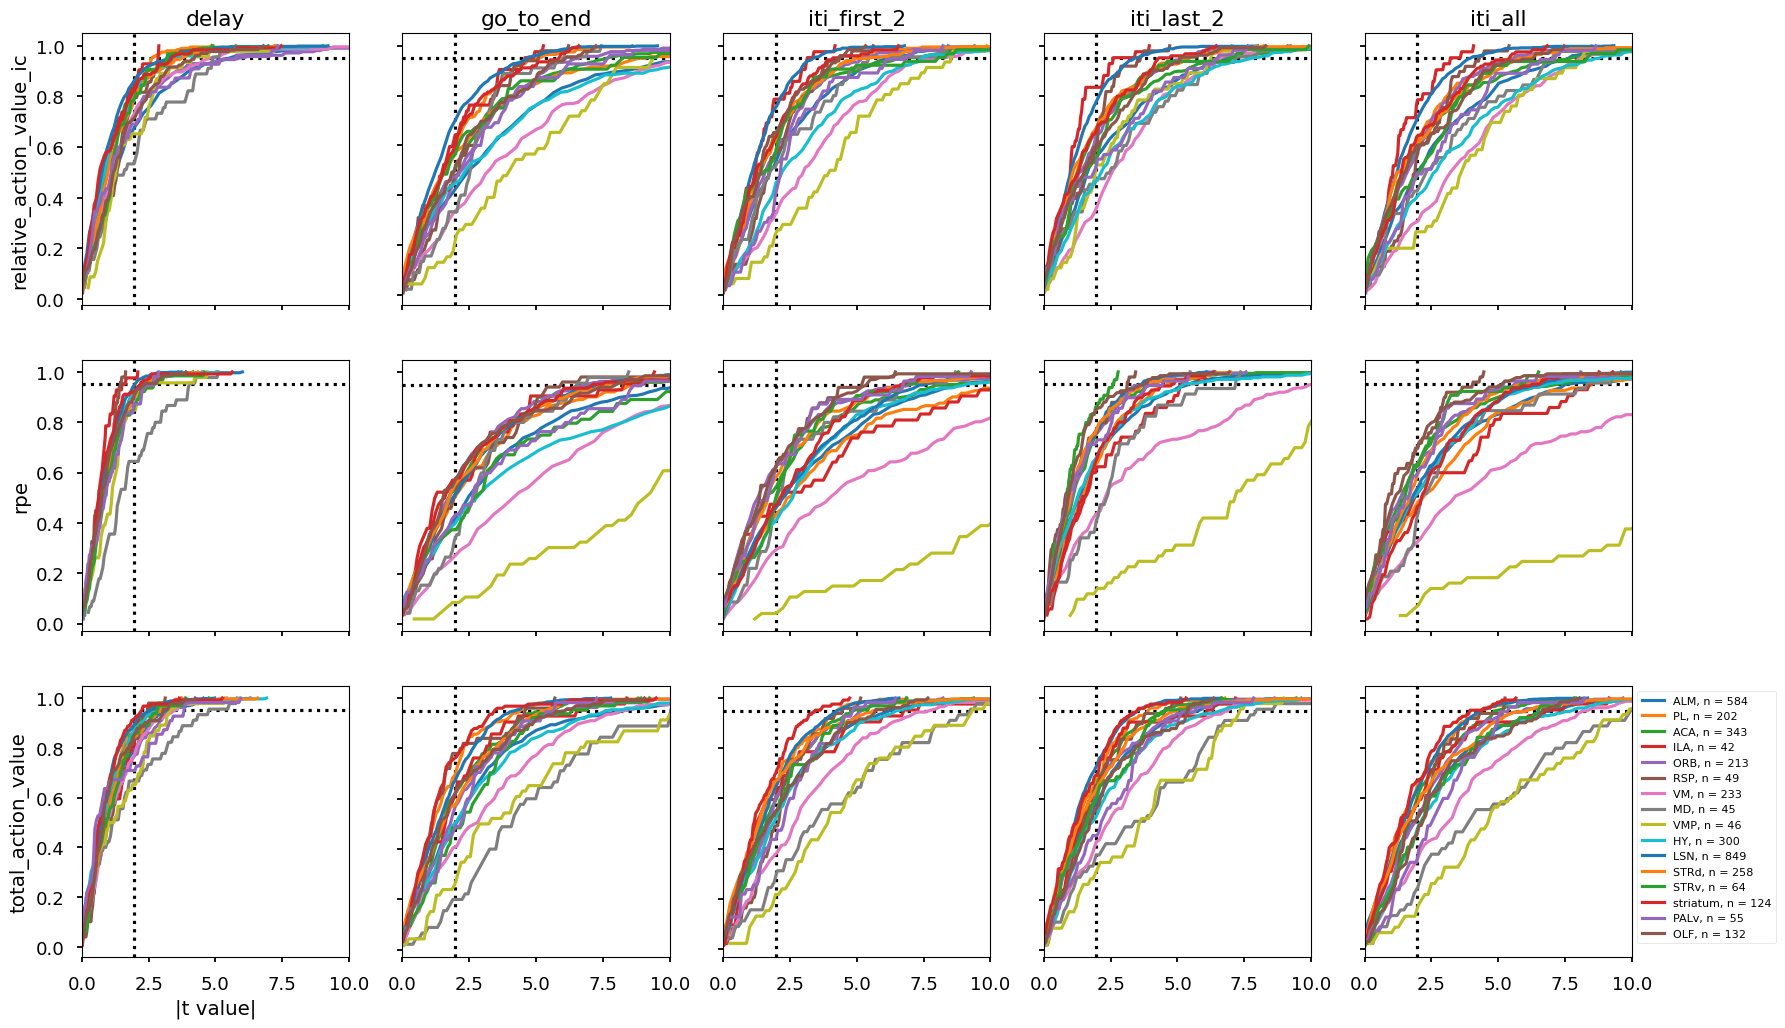

In [35]:
  
    foraging_sess = foraging_analysis.SessionTaskProtocol & 'session_task_protocol = 100'
    linear_model='Q_rel + Q_tot + rpe'
    epochs = ['delay', 'go_to_end', 'iti_first_2', 'iti_last_2', 'iti_all']
    color=''
    
    
    # linear_model='Q_c + Q_i + rpe'
    print('define queries...')
    q_unit = (((ephys.Unit & foraging_sess) 
               * ephys.ClusterMetric * ephys.UnitStat)
               #* (psth_foraging.UnitPeriodLinearFit * psth_foraging.UnitPeriodLinearFit.Param & {'multi_linear_model': linear_model}))
              & qc_criteria['minimal']
              & foraging_sess_qc
              )

    q_hist = (q_unit * histology.ElectrodeCCFPosition.ElectrodePosition) * ccf.CCFAnnotation & psth_foraging.UnitPeriodLinearFit
    q_unit_n = dj.U('annotation').aggr(q_hist, area_num_units='count(*)')
    q_hist *= q_unit_n

    lvs = (psth_foraging.LinearModel.X & {'multi_linear_model': linear_model}).fetch('var_name')
    q_all = ((psth_foraging.UnitPeriodLinearFit
              * psth_foraging.UnitPeriodLinearFit.Param
              * q_hist)
              & {'multi_linear_model': linear_model})   
    print('done!')

    # -- t distribution --
    fig, axs = plt.subplots(len(lvs), len(epochs), figsize=(4*len(epochs), 4*len(lvs)))
    
    # Areas that have most number of neurons
    print('plotting t-distributions')
    
    # plt.set_cmap("tab20")
    colors = plt.cm.tab20(np.linspace(0,1,20))
        
    for i, lv in enumerate(lvs):
        for j, ep in enumerate(epochs):
            ax = axs[i, j]
            
            ax.axhline(y=0.95, color='k', linestyle=':')
            ax.axvline(x=1.96, color='k', linestyle=':')
            
            for cc, (region, areas) in enumerate(region_ann_lut.items()):
                q_area_string = ' OR '.join([f'annotation LIKE "{s}"' for s in areas])
                this_ts = (q_all & {'var_name': lv, 'period': ep} & q_area_string).fetch('t')
                this_ts = this_ts[~np.isnan(this_ts)]
                
                values, bin = np.histogram(np.abs(this_ts), 100)
                ax.plot(bin[:-1], np.cumsum(values)/len(this_ts), label=f'{region}, n = {len(this_ts)}',)
                        # color=colors[cc])

            ax.set(xlim=(0, 10))
            ax.label_outer()

            if i == 0:
                ax.set_title(ep)
            if j == 0:
                ax.set_ylabel(lv)
            if i == len(lvs) - 1 and j == 0:
                ax.set_xlabel('|t value|')
                
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=8)

#%%

In [ ]:
region_ann_lut = ['VPM', 'VM', 'MD', 'PL']


for cc, (region, areas) in enumerate(region_ann_lut.items()):
    n_per_region = 10
    
    print(region)
    q_area_string = ' OR '.join([f'annotation LIKE "{s}"' for s in areas])
    
    sorted_keys = (q_all & {'var_name': lv, 'period': ep} & q_area_string).fetch('KEY', order_by='ABS(t) DESC')[:30]

    for unit_key in sorted_keys:
        unit_psth.plot_unit_psth_choice_outcome(unit_key, align_types=['go_cue', 'iti_start'])
        plt.show()


In [73]:
import datajoint as dj; dj.conn().connect()